# Project Description
This project is focused on the Prediction of Concrete compressive strength(MPa, megapascals) based different commonents
The dependent Variable is Concrete compressive strength(MPa, megapascals), while the independent variables are:
1) Cement (component 1)(kg in a m^3 mixture)

2) Blast Furnace Slag (component 2)(kg in a m^3 mixture)	
3) Fly Ash (component 3)(kg in a m^3) 

4) Water (component 4)(kg in a m^3 mixture)	
5) Superplasticizer (component 5)(kg in a m^3 mixture)	
6) Coarse Aggregate (component 6)(kg in a m^3 mixture)	
7) Fine Aggregate (component 7)(kg in a m^3 mixture)	

Different LightGBM models will be developed based on different age of curing.


# Import Important Libraries

In [1]:
import pandas as pd
import fast_ml
from sklearn.preprocessing  import OneHotEncoder
from fast_ml import eda
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import hydroeval as he
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

# Data Preparation and Assessment

In [2]:
#Load and View Data
filepath='Concrete_Data.xlsx'
df=pd.read_excel(filepath,engine='openpyxl') #without engine='openpyxl', I was unable to read the excel file) 
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
from fast_ml import eda

# One of the most useful dataframe summary view
summary_df = eda.df_info(df)
summary_df

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Cement,float64,Numerical,280,"[540.0, 332.5, 198.6, 266.0, 380.0, 475.0, 427...",0,0
Blast Furnace Slag,float64,Numerical,187,"[0.0, 142.5, 132.4, 114.0, 95.0, 47.5, 190.0, ...",0,0
Fly Ash,float64,Numerical,163,"[0.0, 96.67, 94.58, 100.52, 125.4, 121.62, 118...",0,0
Water,float64,Numerical,205,"[162.0, 228.0, 192.0, 146.0, 170.1, 175.5, 153...",0,0
Superplasticizer,float64,Numerical,155,"[2.5, 0.0, 10.1, 8.6, 16.5, 18.6, 23.4, 8.9, 3...",0,0
Coarse Aggregate,float64,Numerical,284,"[1040.0, 1055.0, 932.0, 978.4, 1047.0, 971.0, ...",0,0
Fine Aggregate,float64,Numerical,304,"[676.0, 594.0, 825.5, 670.0, 806.9, 850.6, 800...",0,0
Age (day),int64,Numerical,14,"[28, 270, 365, 360, 90, 180, 3, 7, 56, 91]",0,0
Concrete Compressive Strength,float64,Numerical,938,"[79.98611076, 61.887365759999994, 40.269535256...",0,0


In [4]:
#simple Descriptive Statistics of Data
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete Compressive Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225



Correlation matrix:
                                Cement   Blast Furnace Slag   Fly Ash   \
Cement                         1.000000            -0.275193 -0.397475   
Blast Furnace Slag            -0.275193             1.000000 -0.323569   
Fly Ash                       -0.397475            -0.323569  1.000000   
Water                         -0.081544             0.107286 -0.257044   
Superplasticizer               0.092771             0.043376  0.377340   
Coarse Aggregate              -0.109356            -0.283998 -0.009977   
Fine Aggregate                -0.222720            -0.281593  0.079076   
Age (day)                      0.081947            -0.044246 -0.154370   
Concrete Compressive Strength  0.497833             0.134824 -0.105753   

                                Water    Superplasticizer   \
Cement                        -0.081544           0.092771   
Blast Furnace Slag             0.107286           0.043376   
Fly Ash                       -0.257044           0.

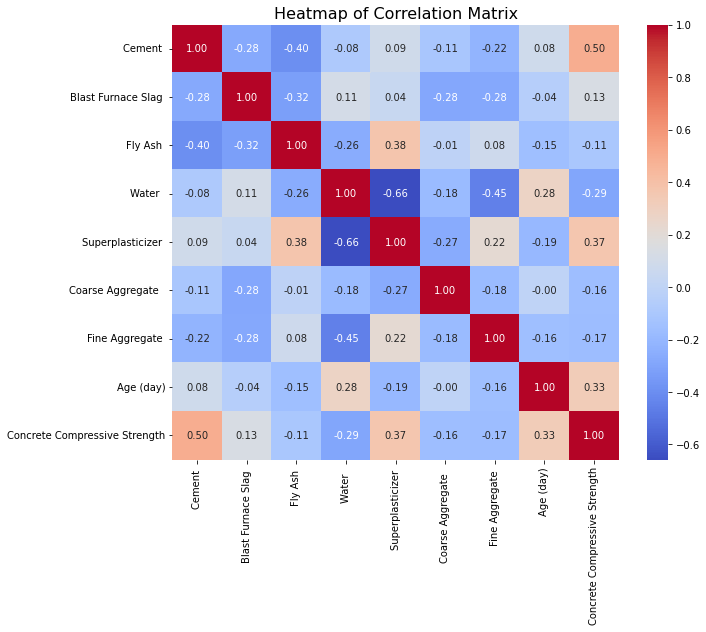

In [5]:
corr = df.corr()
print("\nCorrelation matrix:")
print(corr)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()


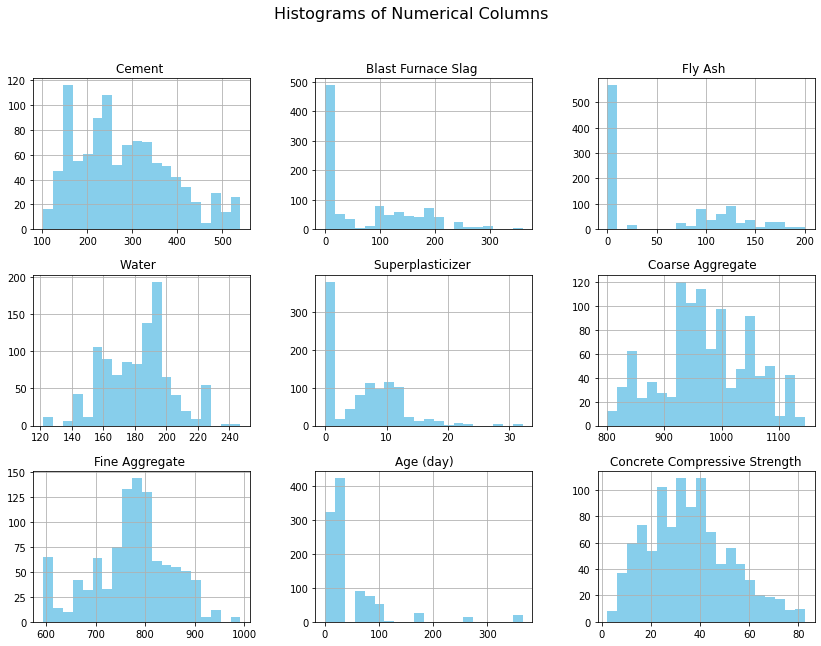

In [6]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()
